# AI Benchmark Analysis

This notebook analyzes the results of 100 simulated games between the Old AI and the New AI.
The benchmark consists of two phases:
- **Phase 1**: Old AI plays Black (First), New AI plays White.
- **Phase 2**: New AI plays Black (First), Old AI plays White.

We will analyze win rates, game duration, and move times.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Load data
games_df = pd.read_csv('benchmark_games.csv')
moves_df = pd.read_csv('benchmark_moves.csv')

print("Games Data:")
display(games_df.head())
print("\nMoves Data:")
display(moves_df.head())

Games Data:


,game_id,phase,winner,total_time,black_score,white_score,black_player,white_player
0,1,1,Old AI,88.237982,42,22,Old AI,New AI
1,2,1,New AI,80.380570,5,59,Old AI,New AI
2,3,1,New AI,84.443665,25,39,Old AI,New AI
3,4,1,Old AI,79.756535,54,10,Old AI,New AI
4,5,1,New AI,82.124326,11,53,Old AI,New AI



Moves Data:


,game_id,move_number,player_type,move_time
0,1,1,Old AI,0.338188
1,1,2,New AI,2.000041
2,1,3,Old AI,0.535603
3,1,4,New AI,2.000046
4,1,5,Old AI,2.000059


## 1. Overall Win Rate Analysis

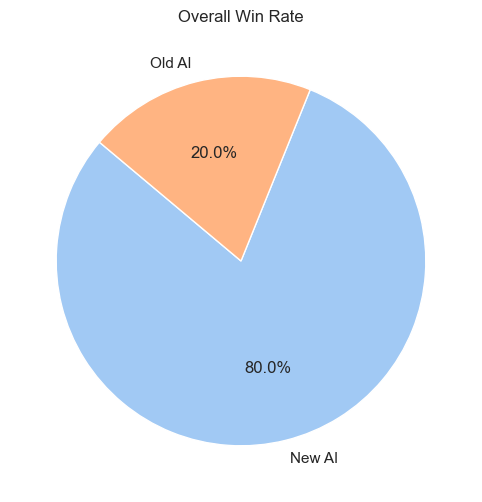

winner
New AI    80
Old AI    20
Name: count, dtype: int64


In [16]:
win_counts = games_df['winner'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Overall Win Rate')
plt.show()

print(win_counts)

## 2. Win Rate per Phase

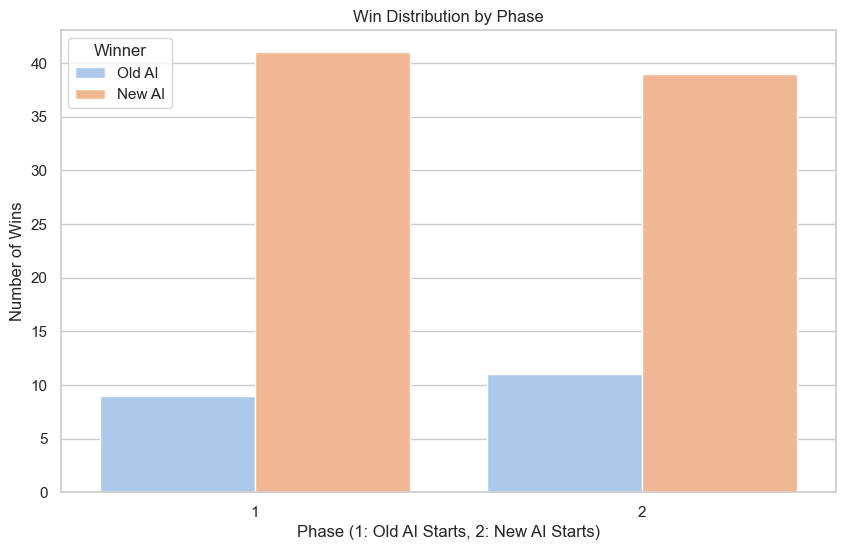

winner  New AI  Old AI
phase                 
1           41       9
2           39      11


In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=games_df, x='phase', hue='winner', palette='pastel')
plt.title('Win Distribution by Phase')
plt.xlabel('Phase (1: Old AI Starts, 2: New AI Starts)')
plt.ylabel('Number of Wins')
plt.legend(title='Winner')
plt.show()

phase_wins = games_df.groupby(['phase', 'winner']).size().unstack(fill_value=0)
print(phase_wins)

## 3. Game Time Analysis

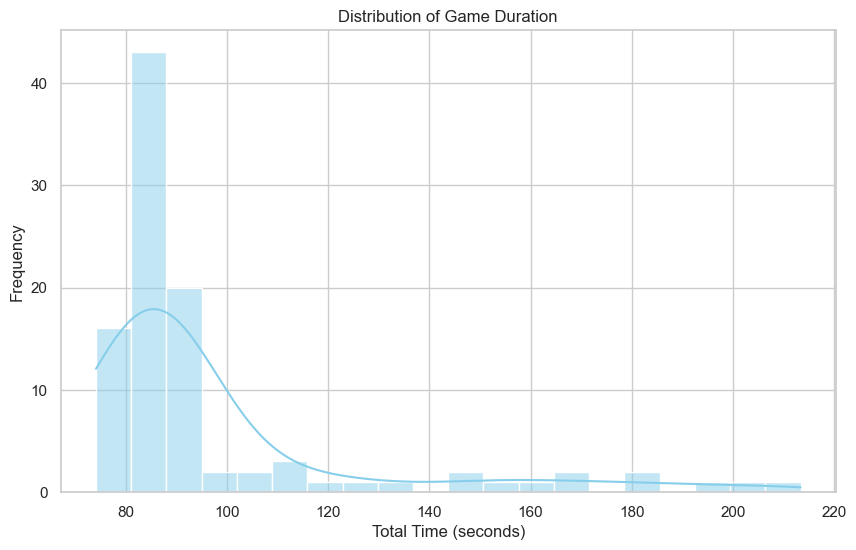

Mean Game Time: 97.53s
Median Game Time: 86.71s


In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=games_df, x='total_time', kde=True, bins=20, color='skyblue')
plt.title('Distribution of Game Duration')
plt.xlabel('Total Time (seconds)')
plt.ylabel('Frequency')
plt.show()

print(f"Mean Game Time: {games_df['total_time'].mean():.2f}s")
print(f"Median Game Time: {games_df['total_time'].median():.2f}s")

## 4. Game Time per Phase

C:\Users\paaar\AppData\Local\Temp\ipykernel_28092\4125703556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=games_df, x='phase', y='total_time', palette='pastel')


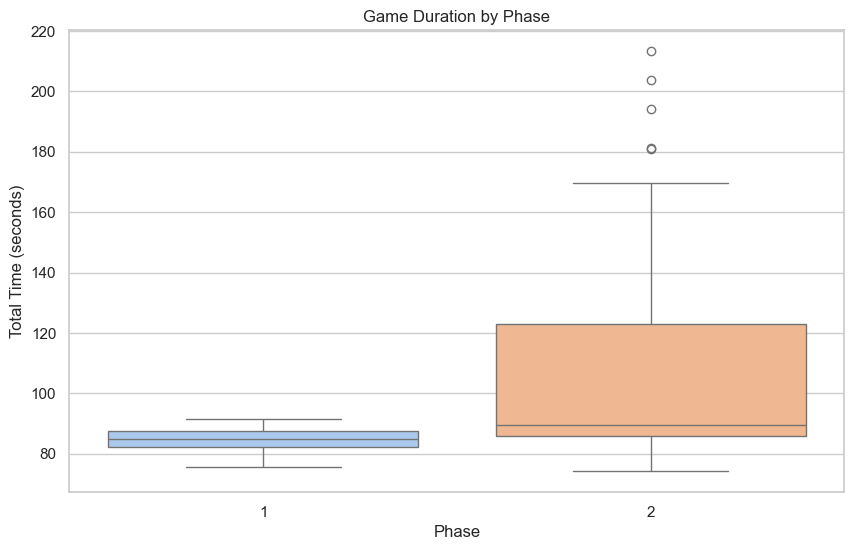

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_df, x='phase', y='total_time', palette='pastel')
plt.title('Game Duration by Phase')
plt.xlabel('Phase')
plt.ylabel('Total Time (seconds)')
plt.show()

## 5. Average Move Time Analysis

C:\Users\paaar\AppData\Local\Temp\ipykernel_28092\1964729367.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=moves_df, x='player_type', y='move_time', ci='sd', palette='pastel')
C:\Users\paaar\AppData\Local\Temp\ipykernel_28092\1964729367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=moves_df, x='player_type', y='move_time', ci='sd', palette='pastel')


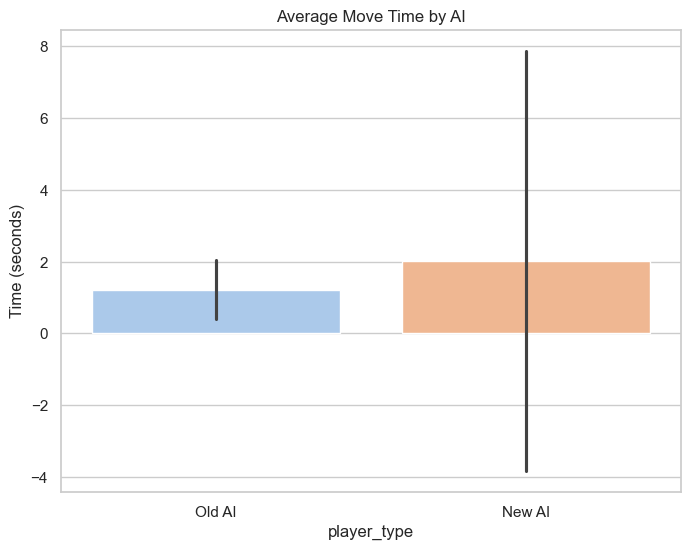

              count      mean       std       min       25%       50%  \
player_type                                                             
New AI       3023.0  2.020746  5.850780  0.000021  2.000031  2.000038   
Old AI       2974.0  1.225040  0.832627  0.000024  0.325893  1.607430   

                  75%         max  
player_type                        
New AI       2.000047  130.966995  
Old AI       2.000065    2.000860  


In [20]:
# Overall Average Move Time
plt.figure(figsize=(8, 6))
sns.barplot(data=moves_df, x='player_type', y='move_time', ci='sd', palette='pastel')
plt.title('Average Move Time by AI')
plt.ylabel('Time (seconds)')
plt.show()

print(moves_df.groupby('player_type')['move_time'].describe())

## 6. Move Time Progression

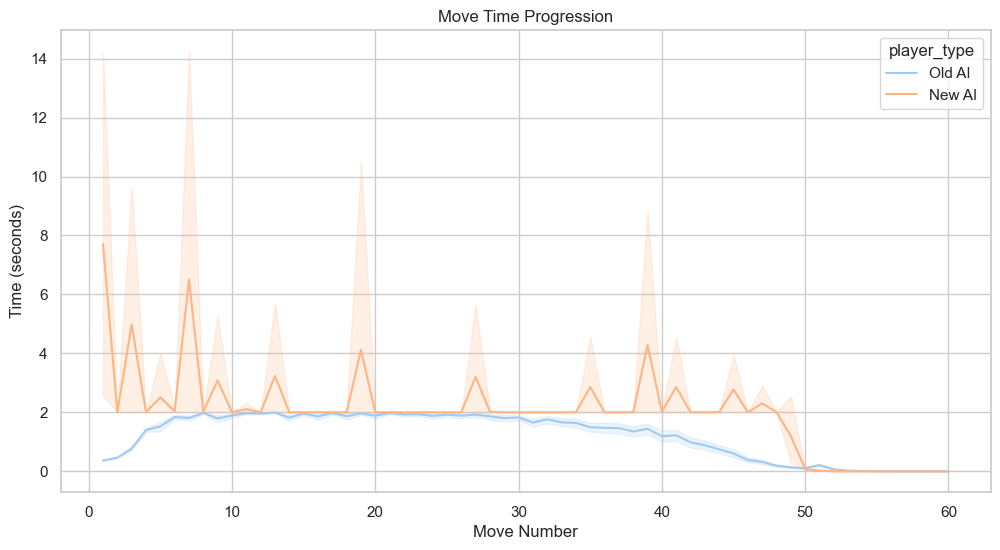

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=moves_df, x='move_number', y='move_time', hue='player_type', palette='pastel')
plt.title('Move Time Progression')
plt.xlabel('Move Number')
plt.ylabel('Time (seconds)')
plt.show()

## 7. Summary and Conclusion

In [22]:
summary = {
    "Total Games": len(games_df),
    "Old AI Wins": win_counts.get("Old AI", 0),
    "New AI Wins": win_counts.get("New AI", 0),
    "Ties": win_counts.get("Tie", 0),
    "Old AI Win Rate": f"{win_counts.get('Old AI', 0) / len(games_df) * 100:.1f}%",
    "New AI Win Rate": f"{win_counts.get('New AI', 0) / len(games_df) * 100:.1f}%",
    "Mean Game Time": f"{games_df['total_time'].mean():.2f}s",
    "Old AI Avg Move Time": f"{moves_df[moves_df['player_type']=='Old AI']['move_time'].mean():.4f}s",
    "New AI Avg Move Time": f"{moves_df[moves_df['player_type']=='New AI']['move_time'].mean():.4f}s"
}

print("Benchmark Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")

Benchmark Summary:
Total Games: 100
Old AI Wins: 20
New AI Wins: 80
Ties: 0
Old AI Win Rate: 20.0%
New AI Win Rate: 80.0%
Mean Game Time: 97.53s
Old AI Avg Move Time: 1.2250s
New AI Avg Move Time: 2.0207s
